In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
name = 'RELIANCE'

In [3]:
### Importing the training set

dataset = pd.read_csv('./Preprocess_Data/'+str(name) +'.csv')
dataset = dataset.iloc[::-1,:]
training_set = dataset.iloc[:len(dataset)-15, 2:3].values


In [4]:
training_set_scaled = training_set

In [5]:
###Creating a data structure with 30 timesteps and 1 output
X_train = []
y_train = []
for i in range(30, len(training_set) ):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

#### Building Model ( Random forest for regression)

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
model_rf = RandomForestRegressor(n_estimators=60, criterion='mae', random_state=100)
model_rf.fit(X_train, y_train) 

RandomForestRegressor(criterion='mae', n_estimators=60, random_state=100)

In [8]:
############### Making the predictions and visualising the results ###############
###Getting the real stock price
dataset_test = dataset.iloc[len(dataset)-15:, :]
real_stock_price = dataset.iloc[len(dataset)-15:, 2:3].values

In [9]:
###Getting the predicted stock price
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1,1)
#inputs = sc.transform(inputs)
#real_stock_price = sc.transform(real_stock_price)
X_test = []
for i in range(30, 30+len(real_stock_price)):
    X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model_rf.predict(X_test)
#predicted_stock_price = sc.inverse_transform(predicted_stock_price)

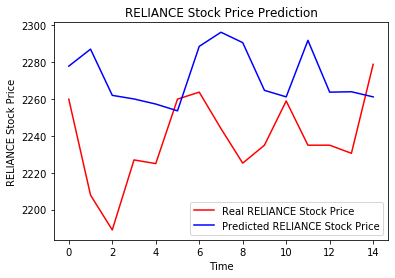

In [10]:
###Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real '+ name+' Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted '+ name+' Stock Price')
plt.title(name+' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(name+' Stock Price')
plt.legend()
plt.show()

In [11]:
### Implement mean absolute error
from sklearn.metrics import mean_absolute_error
print('mean abs error', mean_absolute_error(real_stock_price,predicted_stock_price))


mean abs error 36.89244444444439
